In [234]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math
import tabulate

In [233]:
!pip install tabulate

# Method (i)
Taken directly from measurement and made into modules. Module performance measured directly and after 24 hours. To verify if the cells degrade after being put into a module.

In [310]:
Cell_degradation_test_1 = pd.read_excel('B. Cell degradation test.xlsx', 
                                        usecols='B:K', skiprows = 6, nrows = 3)
Cell_degradation_test_1.columns = Cell_degradation_test_1.columns.str.replace('Unnamed: 6', 'Type')
Cell_degradation_test_1.iloc[:,5] = "Original"
Cell_degradation_test_1["Type.1"] = "After 24h"
Cell_degradation_test_1["Symbol"] = ["circle","cross","diamond"]
Cell_degradation_test_1

,Group,Voc,Isc,FF,Power,Type,Voc.1,Isc.1,FF.1,Power.1,Type.1,Symbol
0,Module 1,2.38,6.58,60.1,9.399,Original,2.41,6.58,60.1,9.525,After 24h,circle
1,Module 2,2.39,6.59,59.6,9.388,Original,2.41,6.61,59.6,9.486,After 24h,cross
2,Module 3,2.39,6.57,59.4,9.314,Original,2.40,6.60,59.3,9.377,After 24h,diamond


In [346]:
6.58 * 1000 / 15.6 /15.6

27.038132807363578

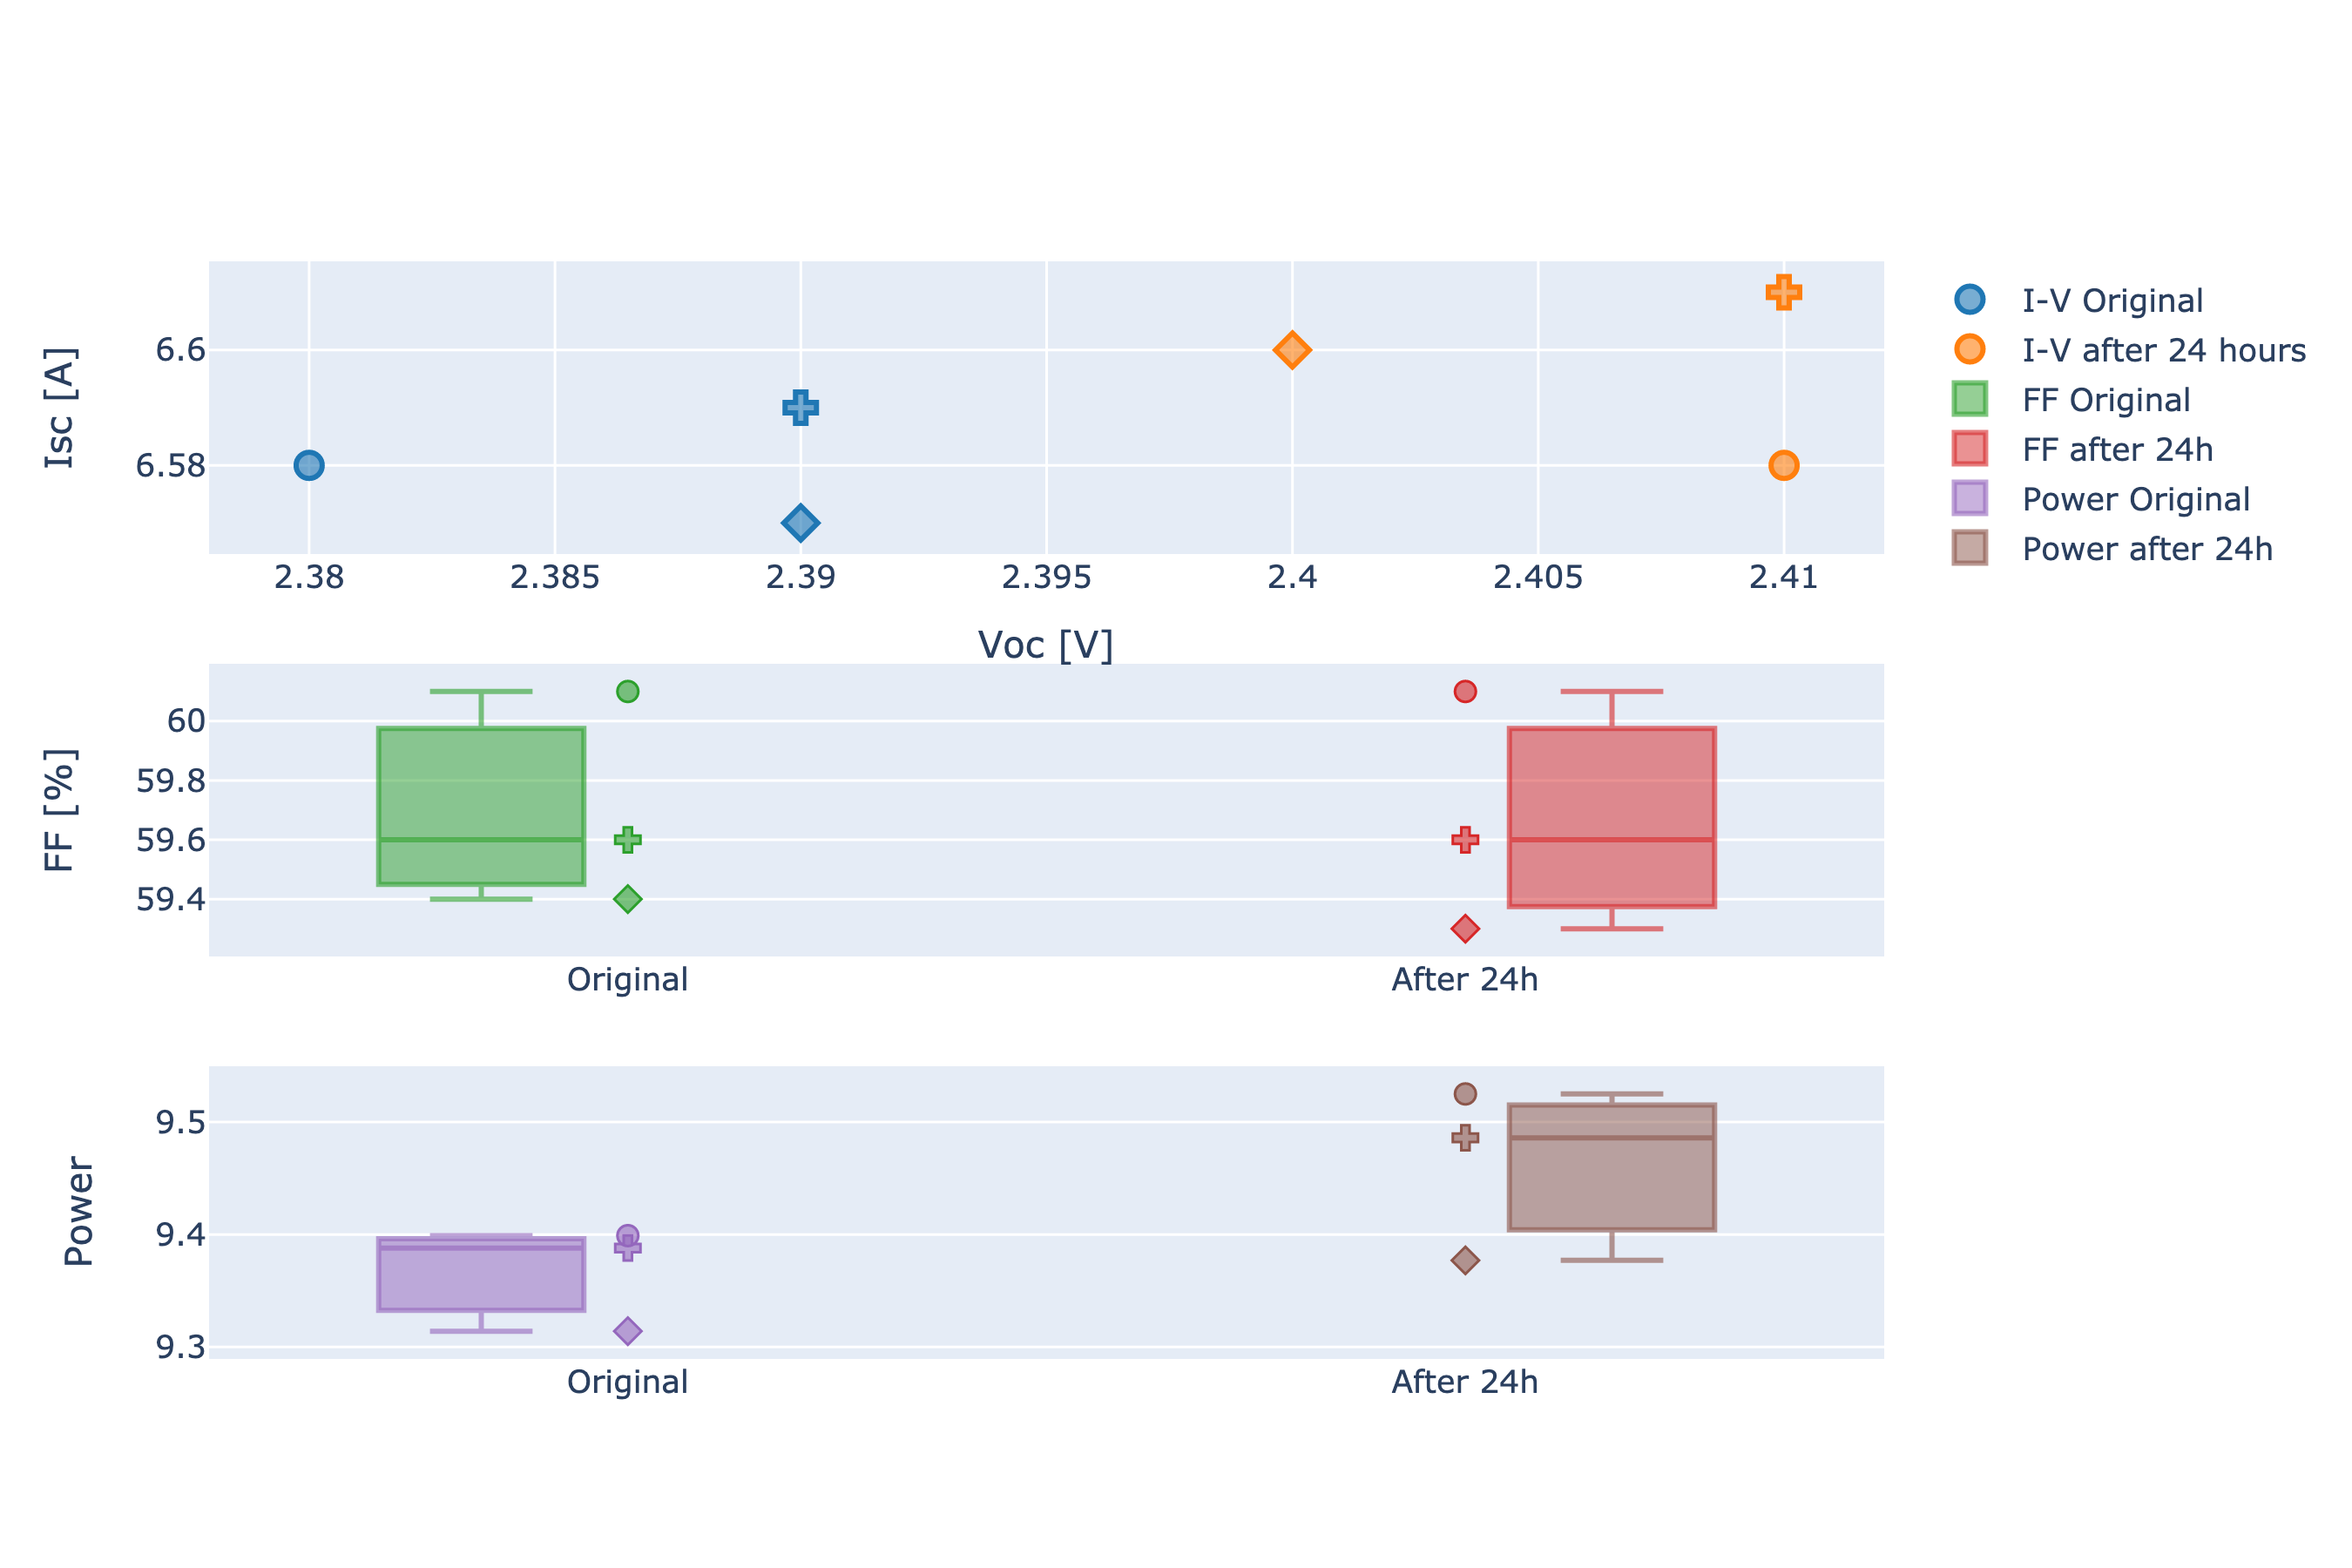

In [370]:
fig_Cd_1 = make_subplots(rows=3, cols=1,vertical_spacing=0.1)

fig_Cd_1.add_trace(
    go.Scatter(x = Cell_degradation_test_1['Voc'], y = Cell_degradation_test_1['Isc'], 
               mode = "markers", marker_symbol = Cell_degradation_test_1['Symbol'],
               marker_line_width=2, marker_size=10, 
               marker_line_color='rgb(31, 119, 180)', marker_color='rgba(31, 119, 180,0.6)',
              name = "I-V Original"),
    row=1, col=1
)

fig_Cd_1.add_trace(
    go.Scatter(x = Cell_degradation_test_1['Voc.1'], y = Cell_degradation_test_1['Isc.1'],
               mode = "markers", marker_symbol = Cell_degradation_test_1['Symbol'],
               marker_line_width=2, marker_size=10,
               marker_line_color='rgb(255, 127, 14)', marker_color='rgba(255, 127, 14,0.6)',
              name = "I-V after 24 hours"),
    row=1, col=1
)

#######Row 2
fig_Cd_1.add_trace(
    go.Box(y = Cell_degradation_test_1['FF'], x = Cell_degradation_test_1['Type'],offsetgroup = "A",
           name = "FF Original ",marker_color='rgb(44, 160, 44)', line_color='rgba(44, 160, 44, 0.6)'),
    row=2, col=1
)

fig_Cd_1.add_trace(
    go.Scatter(y = Cell_degradation_test_1['FF'], x = Cell_degradation_test_1['Type'], 
               mode = "markers", marker_symbol = Cell_degradation_test_1['Symbol'],
               marker_line_width=1, marker_size=8, showlegend = False,
               marker_line_color='rgb(44, 160, 44)', marker_color='rgba(44, 160, 44,0.6)'),
    row=2, col=1
)
##
fig_Cd_1.add_trace(
    go.Box(y = Cell_degradation_test_1['FF.1'],  x = Cell_degradation_test_1['Type.1'], offsetgroup = "B",
           name = "FF after 24h",marker_color='rgb(214, 39, 40)', line_color='rgba(214, 39, 40, 0.6)'),
    row=2, col=1
)

fig_Cd_1.add_trace(
    go.Scatter(y = Cell_degradation_test_1['FF.1'], x = Cell_degradation_test_1['Type.1'],
               mode = "markers", marker_symbol = Cell_degradation_test_1['Symbol'],
               marker_line_width=1, marker_size=8, showlegend = False,
               marker_line_color='rgb(214, 39, 40)', marker_color='rgba(214, 39, 40,0.6)'),
    row=2, col=1
)
#######Row 3
fig_Cd_1.add_trace(
    go.Box(y = Cell_degradation_test_1['Power'], x = Cell_degradation_test_1['Type'], offsetgroup = "A",
           name = "Power Original ", marker_color='rgb(148, 103, 189)', line_color='rgba(148, 103, 189, 0.6)'),
    row=3, col=1
)

fig_Cd_1.add_trace(
    go.Scatter(y = Cell_degradation_test_1['Power'], x = Cell_degradation_test_1['Type'], 
               mode = "markers", marker_symbol = Cell_degradation_test_1['Symbol'],
               marker_line_width=1, marker_size=8, 
               marker_line_color='rgb(148, 103, 189)', marker_color='rgba(148, 103, 189,0.6)',
              showlegend = False,),
    row=3, col=1
)

###
fig_Cd_1.add_trace(
    go.Box(y = Cell_degradation_test_1['Power.1'],  x = Cell_degradation_test_1['Type.1'], offsetgroup = "B", 
           name = "Power after 24h", marker_color='rgb(140, 86, 75)', line_color='rgba(140, 86, 75, 0.6)'),
    row=3, col=1
)

fig_Cd_1.add_trace(
    go.Scatter(y = Cell_degradation_test_1['Power.1'], x = Cell_degradation_test_1['Type.1'],
               mode = "markers", marker_symbol = Cell_degradation_test_1['Symbol'],
               marker_line_width=1, marker_size=8,
               marker_line_color='rgb(140, 86, 75)', marker_color='rgba(140, 86, 75,0.6)',
              showlegend = False,),
    row=3, col=1
)

fig_Cd_1.update_layout(#title="Measurement directly to module. Origianl VS After 24h.",
    boxmode='group', height=700, width=900,
                       xaxis=dict(title="Voc [V]"),
                       yaxis=dict(title="Isc [A]"),
                       yaxis2=dict(title="FF [%]"),
                       yaxis3=dict(title="Power")
                    ) 
fig_Cd_1.show(renderer="png", scale=3, width=900, height=600)
#1f77b4 or rgb(31, 119, 180)  // muted blue
#ff7f0e or rgb(255, 127, 14)  // safety orange
#2ca02c or rgb(44, 160, 44)   // cooked asparagus green
#d62728 or rgb(214, 39, 40)   // brick red
#9467bd or rgb(148, 103, 189) // muted purple
#8c564b or rgb(140, 86, 75)   // chestnut brown
#e377c2 or rgb(227, 119, 194)
#7f7f7f or rgb(127, 127, 127)
#bcbd22 or rgb(188, 189, 34)
#17becf or rgb(23, 190, 207)
fig_Cd_1.write_image("1. To module directly.png", scale=3, width=900, height=700) 

In [194]:
Cell_degradation_test_1_ = pd.read_excel('B. Cell degradation test.xlsx', 
                                        usecols='B:K', skiprows = 6, nrows = 3)
Cell_degradation_test_1_ = Cell_degradation_test_1_.drop(columns=['Unnamed: 6'])
Cell_degradation_test_1_["Symbol"] = ["circle","cross","diamond"]
Cell_degradation_test_1_.columns = ['Group', 'Voc-Original', 'Isc-Original', 'FF-Original', 'Power-Original', 
                                     'Voc-after24h', 'Isc-after24h', 'FF-after24h', 'Power-after24h', 'Symbol']
Cell_degradation_test_1_l = pd.wide_to_long(Cell_degradation_test_1_, ['Voc', 'Isc', 'FF', "Power"], 
                                            i=['Symbol'], j='Type', sep='-', suffix=r'\w+')
Cell_degradation_test_1_l.reset_index(inplace=True)
Cell_degradation_test_1_l

,Symbol,Type,Group,Voc,Isc,FF,Power
0,circle,Original,Module 1,2.38,6.58,60.1,9.399
1,cross,Original,Module 2,2.39,6.59,59.6,9.388
2,diamond,Original,Module 3,2.39,6.57,59.4,9.314
3,circle,after24h,Module 1,2.41,6.58,60.1,9.525
4,cross,after24h,Module 2,2.41,6.61,59.6,9.486
5,diamond,after24h,Module 3,2.40,6.60,59.3,9.377


# Method (ii)
Cells taken directly after measurement and stored in the N2-storage

In [350]:
Cell_degradation_test_23_ = pd.read_excel('C. Alkali test.xlsx', 
                                        usecols='B,E,G:J,L:O', skiprows = 1)
Cell_degradation_test_23_.columns = ['Id', 'Storage', 
                                    'Voc [V]-Original', 'Isc [A]-Original', 'FF [%]-Original', 'η [%]-Original', 
                                    'Voc [V]-after24h', 'Isc [A]-after24h', 'FF [%]-after24h', 'η [%]-after24h']
Cell_degradation_test_23_l = pd.wide_to_long(Cell_degradation_test_23_, ['Voc [V]', 'Isc [A]', 'FF [%]', "η [%]"], 
                                            i=['Id'], j='Type', sep='-', suffix=r'\w+')
Cell_degradation_test_23_l.reset_index(inplace=True)
Cell_degradation_test_23_l.head()

,Id,Type,Storage,Voc [V],Isc [A],FF [%],η [%]
0,1511091097,Original,N2-storage,0.617,6.548,68.199997,12.225
1,1511091098,Original,N2-storage,0.619,6.445,67.000000,11.857
2,1511091099,Original,N2-storage,0.618,6.513,67.199997,12.012
3,1511091100,Original,N2-storage,0.625,6.614,68.500000,12.572
4,1511091101,Original,N2-storage,0.624,6.655,67.400002,12.416


In [351]:
Cell_degradation_test_23 = pd.read_excel('C. Alkali test.xlsx', 
                                        usecols='B,E,G:J,L:O', skiprows = 1)
Cell_degradation_test_23['PL-Voc'] = (Cell_degradation_test_23['Voc [V]'] - Cell_degradation_test_23['Voc [V].1'])/ Cell_degradation_test_23['Voc [V]']
Cell_degradation_test_23['PL-Isc'] = (Cell_degradation_test_23['Isc [A]'] - Cell_degradation_test_23['Isc [A].1'])/ Cell_degradation_test_23['Isc [A]']
Cell_degradation_test_23['PL-FF']  = (Cell_degradation_test_23['FF [%]'] -  Cell_degradation_test_23['FF [%].1']) / Cell_degradation_test_23['FF [%]']
Cell_degradation_test_23['PL-η']   = (Cell_degradation_test_23['η [%]'] -   Cell_degradation_test_23['η [%].1'])  / Cell_degradation_test_23['η [%]']
Cell_degradation_test_23.head()

,Id,Storage,Voc [V],Isc [A],FF [%],η [%],Voc [V].1,Isc [A].1,FF [%].1,η [%].1,PL-Voc,PL-Isc,PL-FF,PL-η
0,1511091097,N2-storage,0.617,6.548,68.199997,12.225,0.618,6.555,66.800003,12.021,-0.001621,-0.001069,0.020528,0.016687
1,1511091098,N2-storage,0.619,6.445,67.000000,11.857,0.620,6.453,66.099998,11.741,-0.001615,-0.001241,0.013433,0.009783
2,1511091099,N2-storage,0.618,6.513,67.199997,12.012,0.521,6.526,66.699997,10.068,0.156958,-0.001996,0.007440,0.161838
3,1511091100,N2-storage,0.625,6.614,68.500000,12.572,0.627,6.640,68.099998,12.589,-0.003200,-0.003931,0.005839,-0.001352
4,1511091101,N2-storage,0.624,6.655,67.400002,12.416,0.626,6.650,67.099998,12.407,-0.003205,0.000751,0.004451,0.000725


$Relative Error = \frac{\lVert \textrm{Original measurements - Storage measurement} \rVert_2}{\lVert \textrm{Original measurements} \rVert_2} $

In [352]:
Err = {'En_N2_storage': [1,2,3,4], 'En_IV_room': [1,2,3,4]}
Error = pd.DataFrame(Err)
from numpy import linalg as LA
for i in range(2,6):
 Error.iloc[i-2,0] = LA.norm(Cell_degradation_test_23.iloc[0:72,i]-Cell_degradation_test_23.iloc[0:72,i+4]) / LA.norm(Cell_degradation_test_23.iloc[0:72,i])
 Error.iloc[i-2,1] = LA.norm(Cell_degradation_test_23.iloc[72:144,i]-Cell_degradation_test_23.iloc[72:144,i+4]) / LA.norm(Cell_degradation_test_23.iloc[72:144,i])
print(Error)

   En_N2_storage  En_IV_room
0       0.039369    0.024171
1       0.006816    0.006036
2       0.086903    0.058416
3       0.102914    0.075015


# Check Voc values
Remove outliers PL-Voc >= 0.1

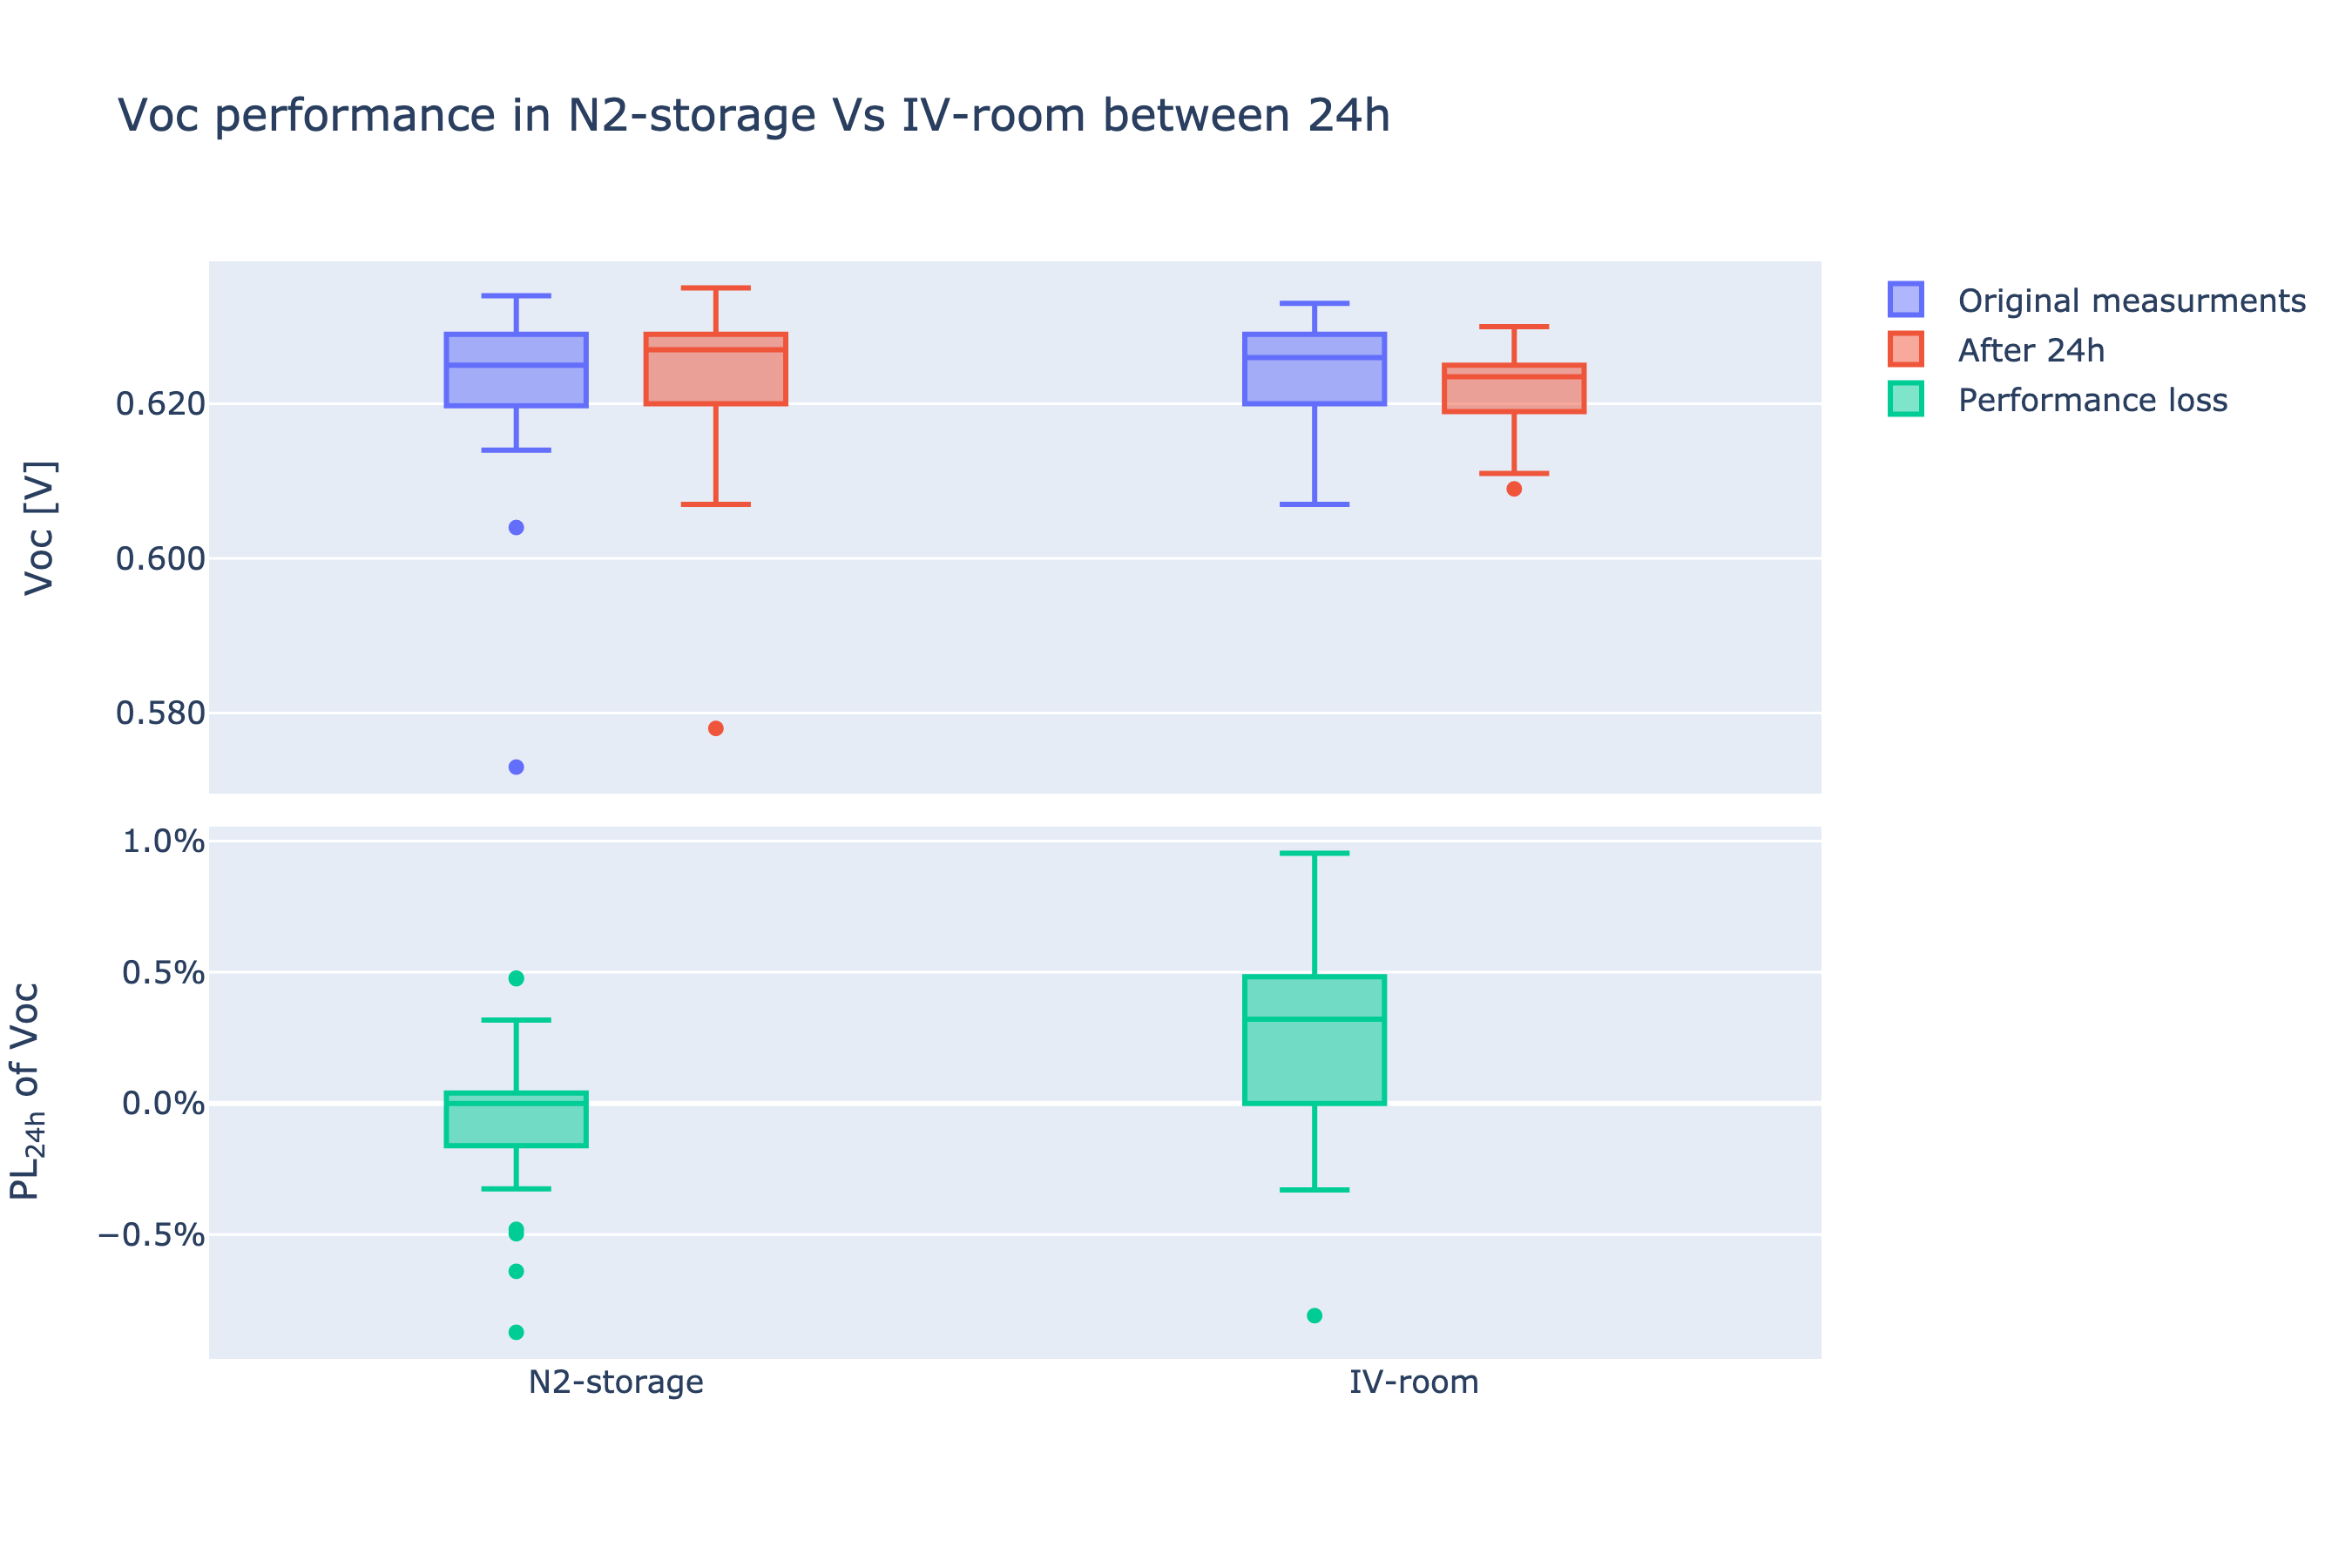

In [369]:
Cell_degradation_test_23_V = Cell_degradation_test_23[(Cell_degradation_test_23['PL-Voc'] < 0.1) 
                                                      & (Cell_degradation_test_23['PL-Voc'] > -0.1)]

fig_Cd_23_V = make_subplots(rows=2, cols=1,shared_xaxes = True,vertical_spacing=0.03)

fig_Cd_23_V.add_trace(
    go.Box(y=Cell_degradation_test_23_V['Voc [V]'], x = Cell_degradation_test_23_V["Storage"], 
           name = "Original measurments", offsetgroup = "A"),
    row=1, col=1
)

fig_Cd_23_V.add_trace(
    go.Box(y=Cell_degradation_test_23_V['Voc [V].1'], x = Cell_degradation_test_23_V["Storage"], 
           name = "After 24h", offsetgroup = "B"),
    row=1, col=1
)


fig_Cd_23_V.add_trace(
    go.Box(y=Cell_degradation_test_23_V['PL-Voc'], x = Cell_degradation_test_23_V["Storage"], 
           name = "Performance loss", offsetgroup = "A"),
    row=2, col=1
)

fig_Cd_23_V.update_layout(title="Voc performance in N2-storage Vs IV-room between 24h",
                          boxmode='group', height=600, width=900,
                     boxgap=0.5,
                     yaxis=dict(title="Voc [V]", tickformat=".3f"),
                     yaxis2=dict(title="PL<sub>24h</sub> of Voc", tickformat=".1%")
                    ) 
fig_Cd_23_V.show(renderer="png", scale=3, width=900, height=600)
fig_Cd_23_V.write_image("3.1.1 Voc performance in N2-storage Vs IV-room between 24h.png", scale=3, width=900, height=600) 

# Check Isc values

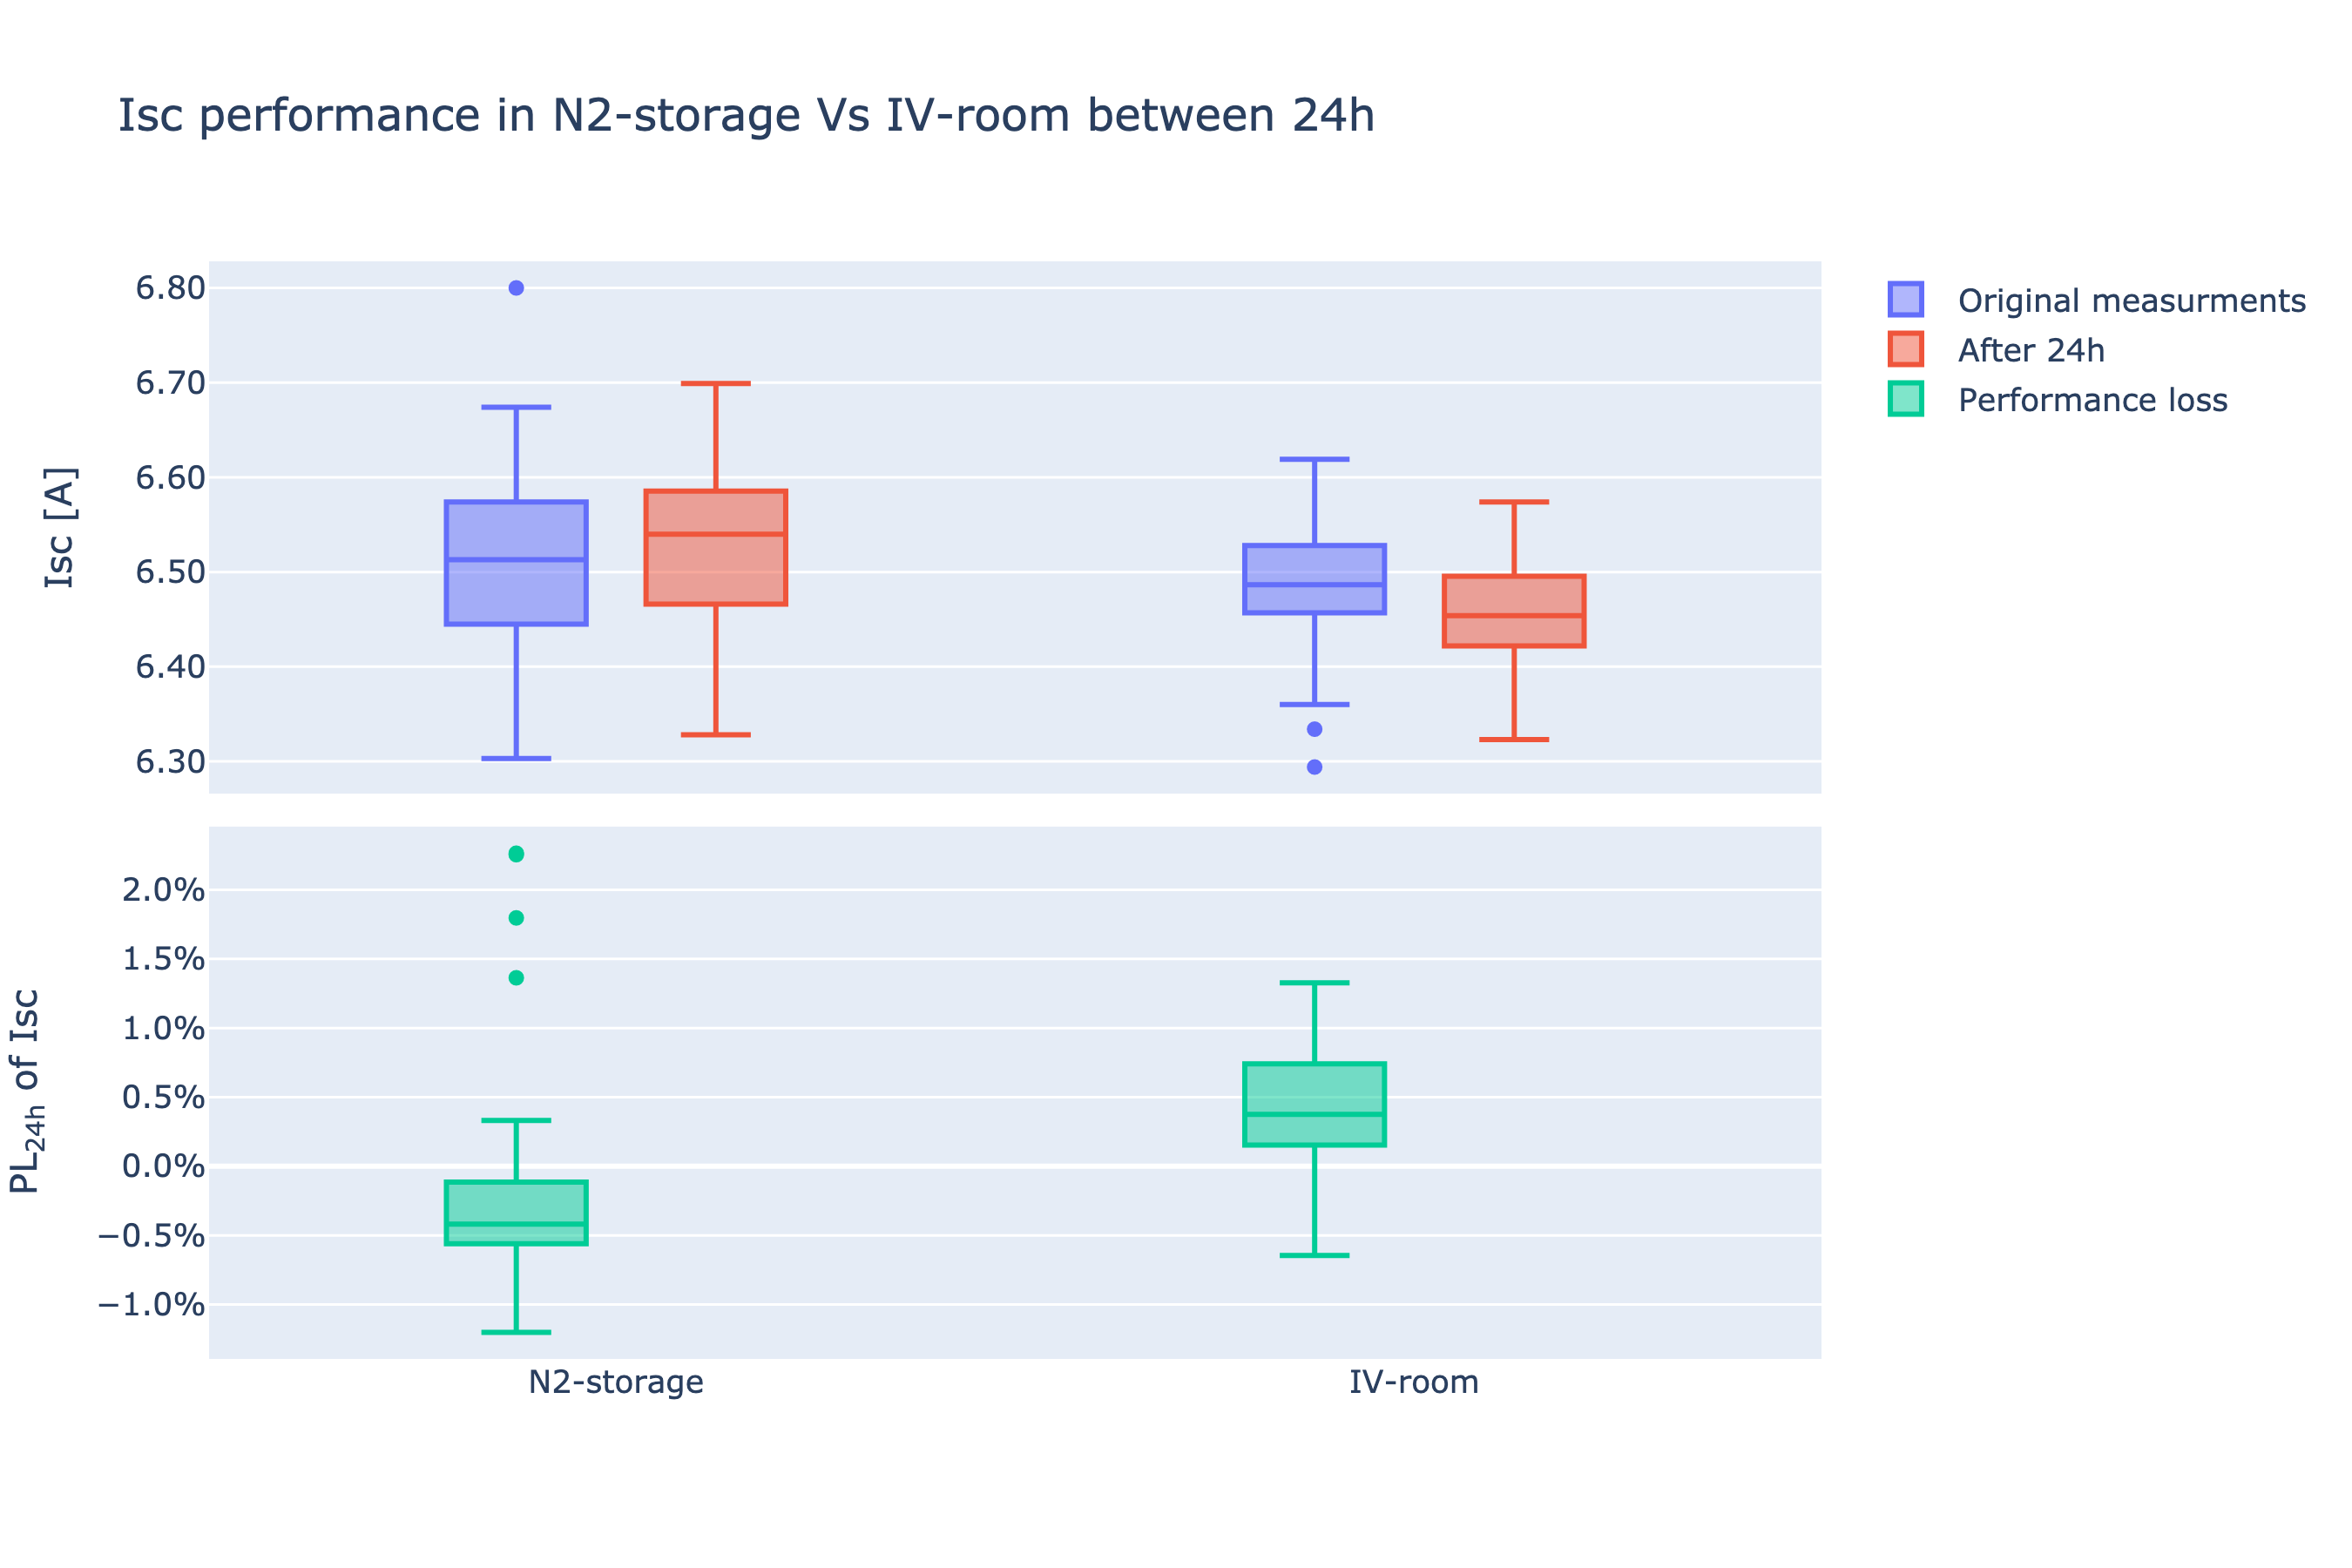

In [368]:
Cell_degradation_test_23_I = Cell_degradation_test_23[Cell_degradation_test_23['PL-Isc'] < 0.1]
Cell_degradation_test_23_I = Cell_degradation_test_23_I[Cell_degradation_test_23_I['PL-Isc'] > -0.1]

fig_Cd_23_I = make_subplots(rows=2, cols=1,shared_xaxes = True,vertical_spacing=0.03)

fig_Cd_23_I.add_trace(
    go.Box(y=Cell_degradation_test_23_I['Isc [A]'], x = Cell_degradation_test_23_I["Storage"], 
           name = "Original measurments", offsetgroup = "A"),
    row=1, col=1
)

fig_Cd_23_I.add_trace(
    go.Box(y=Cell_degradation_test_23_I['Isc [A].1'], x = Cell_degradation_test_23_I["Storage"], 
           name = "After 24h", offsetgroup = "B"),
    row=1, col=1
)


fig_Cd_23_I.add_trace(
    go.Box(y=Cell_degradation_test_23_I['PL-Isc'], x = Cell_degradation_test_23_I["Storage"], 
           name = "Performance loss", offsetgroup = "A"),
    row=2, col=1
)

fig_Cd_23_I.update_layout(title = "Isc performance in N2-storage Vs IV-room between 24h",
    boxmode='group', height=600, width=900, boxgap=0.5,
                     yaxis=dict(title="Isc [A]", tickformat=".2f"),
                     yaxis2=dict(title="PL<sub>24h</sub> of Isc" ,dtick=0.005,tickformat = ',.1%')
                    ) 
fig_Cd_23_I.show(renderer="png", scale=3, width=900, height=600)
fig_Cd_23_I.write_image("3.2.1 Isc performance in N2-storage Vs IV-room between 24h.png", scale=3, width=900, height=600) 

# Check FF

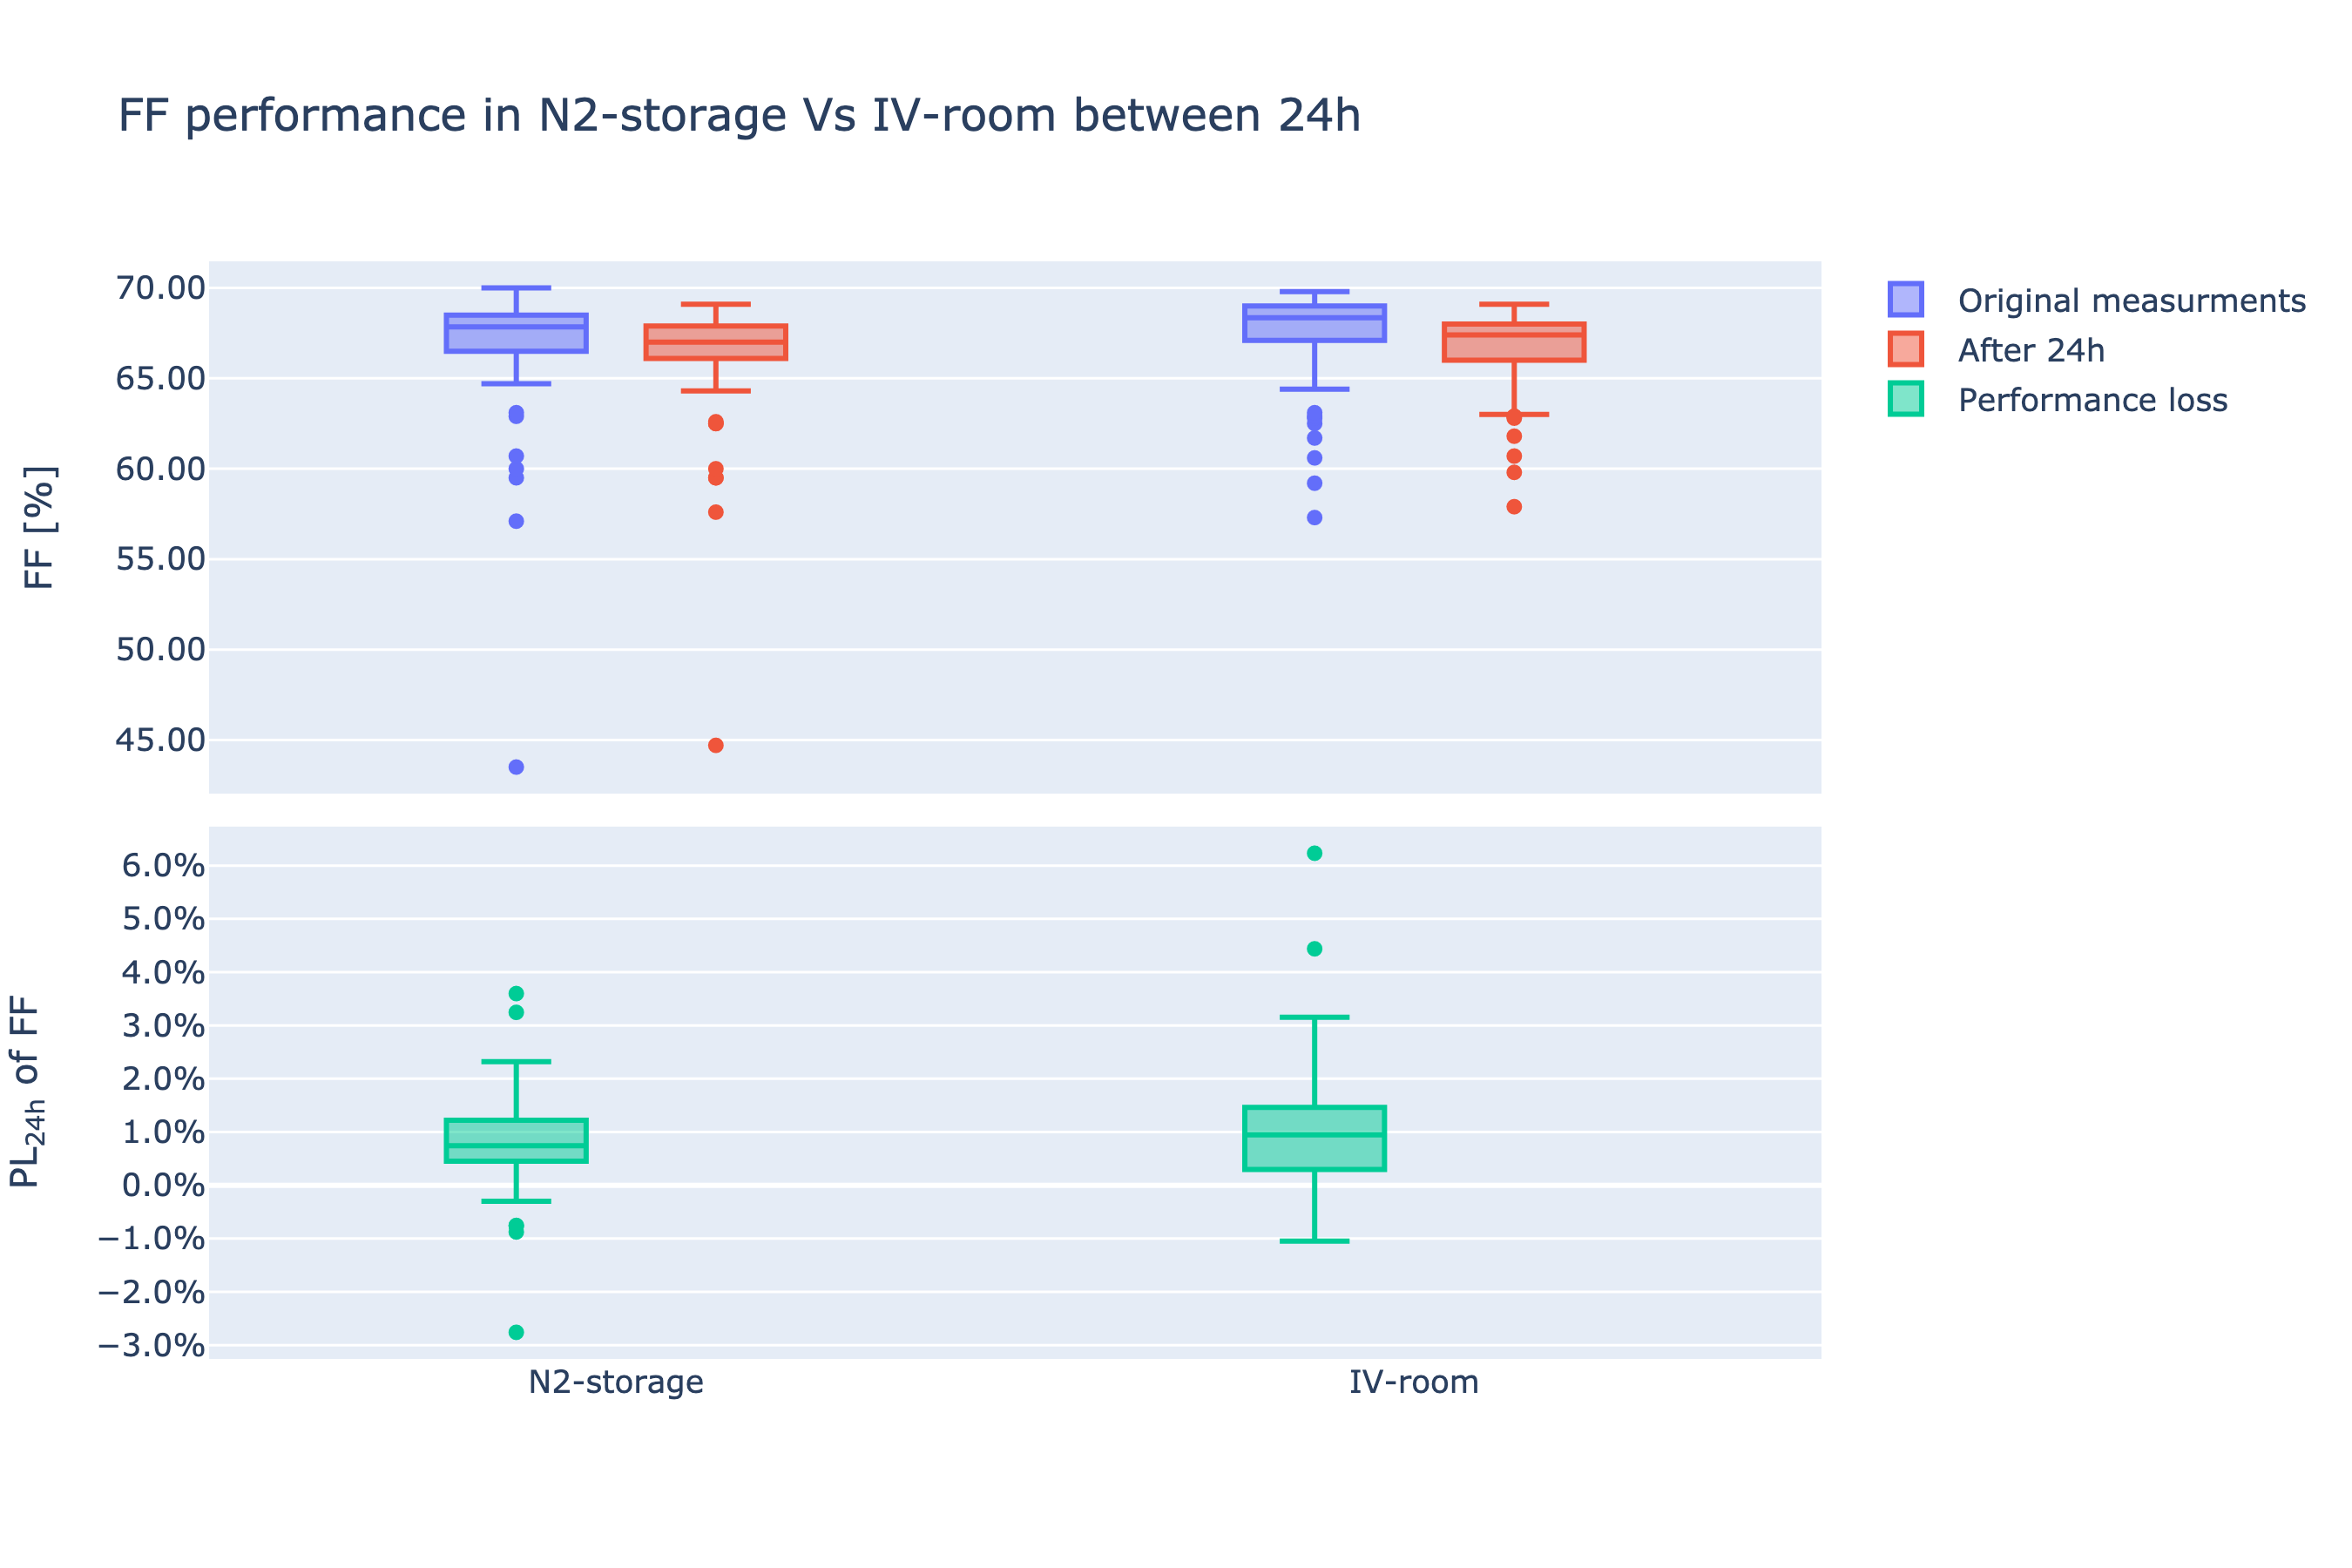

In [367]:
Cell_degradation_test_23_FF = Cell_degradation_test_23[(Cell_degradation_test_23['PL-FF'] < 0.1)&(Cell_degradation_test_23['PL-FF'] > -0.1)]

fig_Cd_23_FF = make_subplots(rows=2, cols=1,shared_xaxes = True,vertical_spacing=0.03)

fig_Cd_23_FF.add_trace(
    go.Box(y=Cell_degradation_test_23_FF['FF [%]'], x = Cell_degradation_test_23_FF["Storage"], 
           name = "Original measurments", offsetgroup = "A"),
    row=1, col=1
)

fig_Cd_23_FF.add_trace(
    go.Box(y=Cell_degradation_test_23_FF['FF [%].1'], x = Cell_degradation_test_23_FF["Storage"], 
           name = "After 24h", offsetgroup = "B"),
    row=1, col=1
)


fig_Cd_23_FF.add_trace(
    go.Box(y=Cell_degradation_test_23_FF['PL-FF'], x = Cell_degradation_test_23_FF["Storage"], 
           name = "Performance loss", offsetgroup = "A"),
    row=2, col=1
)

fig_Cd_23_FF.update_layout(title = "FF performance in N2-storage Vs IV-room between 24h",
                     boxmode='group', height=600, width=900,
                     boxgap=0.5,
                     yaxis=dict(title="FF [%]", tickformat=".2f"),
                     yaxis2=dict(title="PL<sub>24h</sub> of FF" ,dtick=0.01,tickformat = ',.1%')
                    ) 
fig_Cd_23_FF.show(renderer="png", scale=3, width=900, height=600)
fig_Cd_23_FF.write_image("3.3.1 FF performance in N2-storage Vs IV-room between 24h.png", scale=3, width=900, height=600) 

# Check η [%]

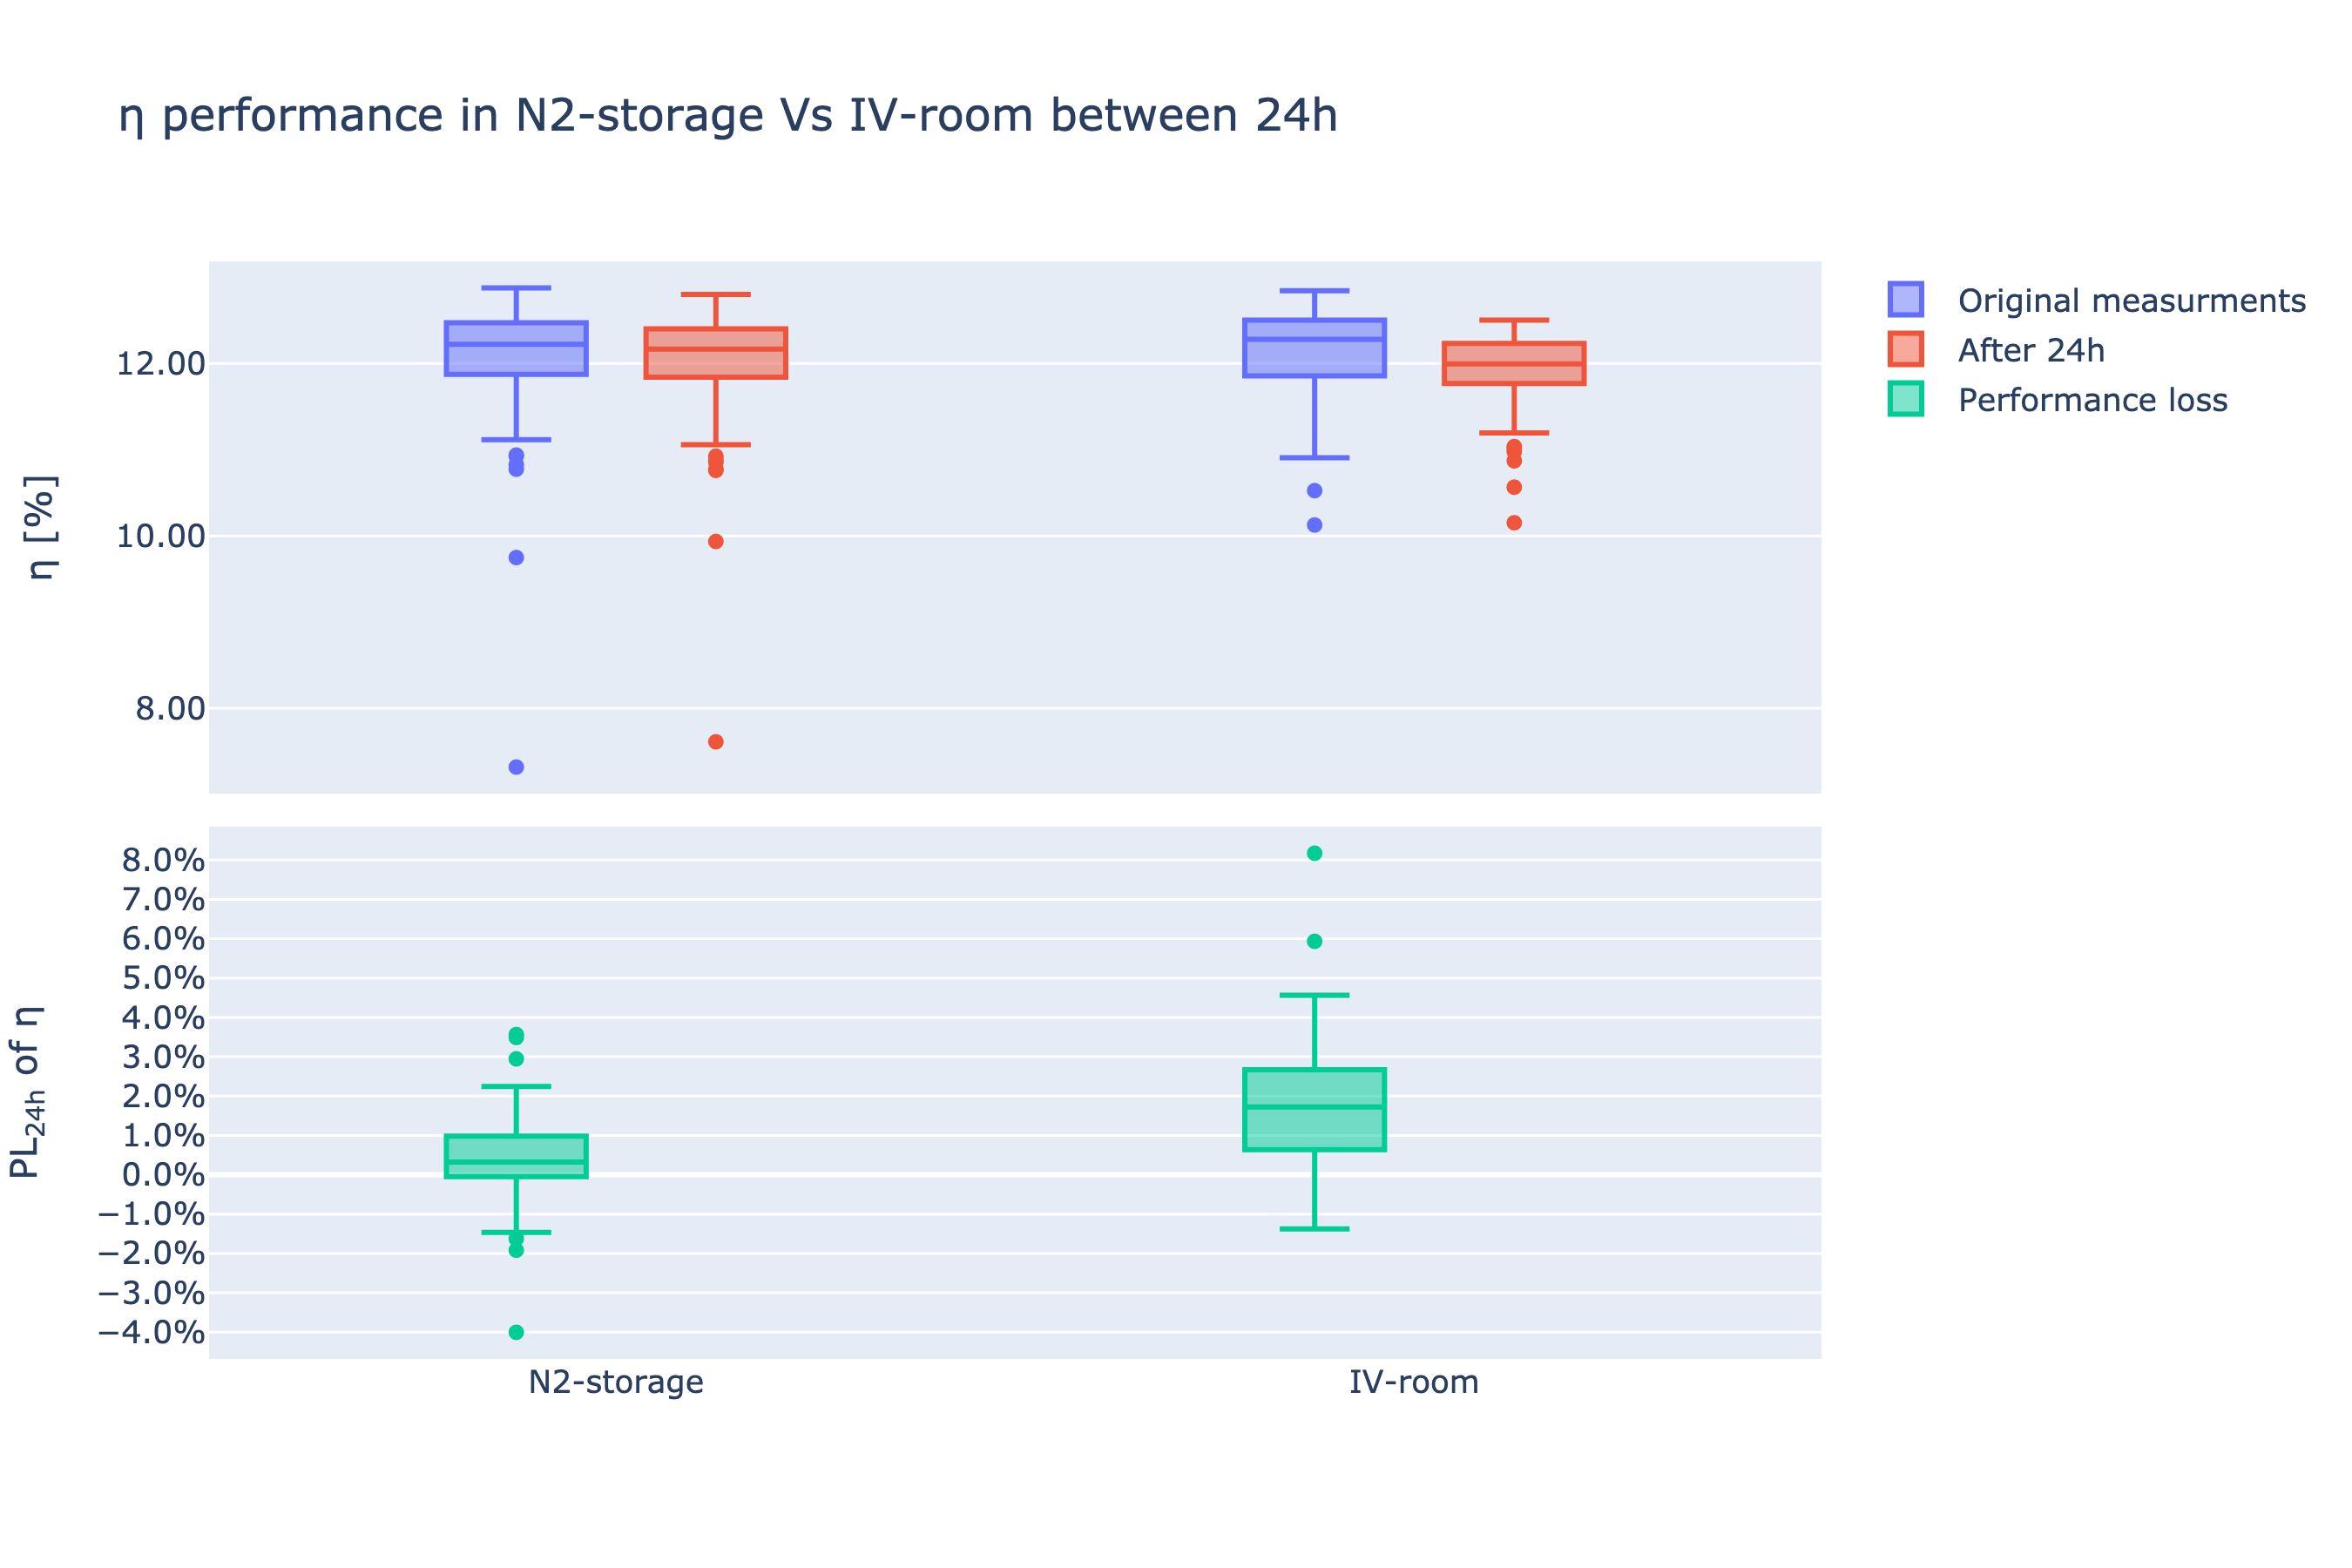

In [366]:
Cell_degradation_test_23_η = Cell_degradation_test_23[(Cell_degradation_test_23['PL-η'] < 0.1)&(Cell_degradation_test_23['PL-η'] > -0.1)]

fig_Cd_23_η = make_subplots(rows=2, cols=1,shared_xaxes = True,vertical_spacing=0.03)

fig_Cd_23_η.add_trace(
    go.Box(y=Cell_degradation_test_23_η['η [%]'], x = Cell_degradation_test_23_η["Storage"], 
           name = "Original measurments", offsetgroup = "A"),
    row=1, col=1
)

fig_Cd_23_η.add_trace(
    go.Box(y=Cell_degradation_test_23_η['η [%].1'], x = Cell_degradation_test_23_η["Storage"], 
           name = "After 24h", offsetgroup = "B"),
    row=1, col=1
)


fig_Cd_23_η.add_trace(
    go.Box(y=Cell_degradation_test_23_η['PL-η'], x = Cell_degradation_test_23_η["Storage"], 
           name = "Performance loss", offsetgroup = "A"),
    row=2, col=1
)

fig_Cd_23_η.update_layout(title = "η performance in N2-storage Vs IV-room between 24h",
                     boxmode='group', height=700, width=900,
                     boxgap=0.5,
                     yaxis=dict(title="η [%]", tickformat=".2f"),
                     yaxis2=dict(title="PL<sub>24h</sub> of η" ,dtick=0.01,tickformat = ',.1%')
                    ) 
fig_Cd_23_η.show(renderer="png", scale=3, width=900, height=600)
fig_Cd_23_η.write_image("3.4.1 η performance in N2-storage Vs IV-room between 24h.png", scale=3, width=900, height=600) 